#### Imports

In [22]:
import os
import requests
import pandas as pd
from PIL import Image
import io
import numpy as np

#### Extract Dataset

In [37]:
# Read the CSV file
file_path = os.path.join(os.getcwd(), "database.csv")
df = pd.read_csv(file_path)

# Extract the sentence
sentence = df['sentence']
image_pos = df['pos_url']
image_neg = df['neg_url']

new_df = pd.DataFrame({
    'sentence': sentence,
    'image_pos': image_pos,
    'image_neg': image_neg
})

new_df.head()


,sentence,image_pos,image_neg
0,man stand behind the wall,https://previews.123rf.com/images/ryanking999/...,https://previews.123rf.com/images/ryanking999/...
1,The woman is sitting against the wall.,http://www.colourbox.com/preview/5020075-52275...,https://st4.depositphotos.com/1462687/20482/i/...
2,Man doing exercise sits in front of a wall,https://hips.hearstapps.com/hmg-prod.s3.amazon...,https://previews.123rf.com/images/ryanking999/...
3,A man is standing on a wall.,https://previews.123rf.com/images/deagreez/dea...,https://thumbs.dreamstime.com/z/%E5%9C%A8%E7%8...
4,A man is standing on a wall.,https://previews.123rf.com/images/deagreez/dea...,https://image.shutterstock.com/z/stock-photo-1...



#### Download Images:

In [148]:
def download_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

# def preprocess_image(img, target_size=(224, 224)):

#     # print("==============================================================")

#     # Show original image
#     # print("Displayed Original Image.")
#     # img.show()

#     # Convert to grayscale if specified and the image is not already grayscale
#     if img.mode != 'L':
#         img = img.convert('L')
#         # print(f" Original image is RGB | new image mode = {img.mode}\n")
#     # else: 
#         # print(f" Original image is Greyscale | image mode = {img.mode}\n")
    
#     # Resize the image
#     print(f" Before Image size: {img.size}")
#     img = img.resize(target_size)
#     print(f" After Image size: {img.size}\n")
    
#     # Convert the image to a numpy array
#     img_array = np.array(img)
#     # print(f" Shape after converting to numpy array: {img_array.shape}")
#     # print(f" Before Normalize img_array: \n{img_array}")
    
#     # Normalize the image
#     img_array = img_array / 255.0
#     # print(f" After Normalize img_array: \n{img_array}\n")
    
#     # Add batch dimension
#     img_array = np.expand_dims(img_array, axis=0)
#     # print(f" Shape after adding batch dimension: {img_array.shape}")
    
#     # # If the image is grayscale, add a channel dimension
#     # if to_grayscale:
#     img_array = np.expand_dims(img_array, axis=-1)
#     # print(f" Shape after adding channel dimension: {img_array.shape}")

#     # print("Displayed Preprocessed Image.")
#     # display_image_from_array(img_array)
#     return img_array

#     # print("==============================================================\n")

# # Download and preprocess images
# image_urls_pos = new_df["image_pos"].iloc(0)
# images = []
# for image_url in image_urls_pos:
#     img = download_image(image_url)
#     img_array = preprocess_image(img, target_size=(224, 224))
#     images.append(img_array)
# images_array_pos = np.vstack(images)

# image_urls_neg = new_df["image_neg"].iloc(0)
# images = []
# for image_url in image_urls_neg:
#     img = download_image(image_url)
#     img_array = preprocess_image(img, target_size=(224, 224))
#     images.append(img_array)
# images_array_neg = np.vstack(images)


#### Extract Feature Vector & transfrom from 2048 to 16x16

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


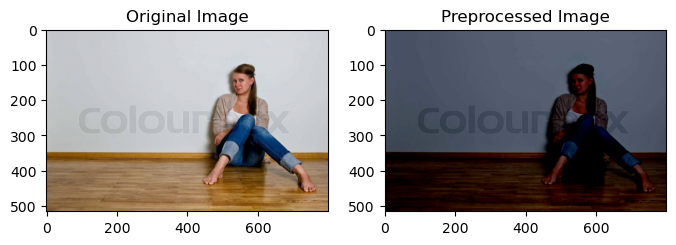

Feature Vector Positive : [ 2.5502552e-06  6.1817218e-13  1.5987212e-13 -4.7961635e-14
 -4.9737992e-14 -1.3216095e-12  7.1054274e-15 -5.5067062e-14
  8.1712415e-14 -6.9944051e-15 -1.4988011e-14 -8.1315163e-19
 -5.8233515e-22  2.0162527e-24  8.4818325e-27  7.2701421e-27]
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


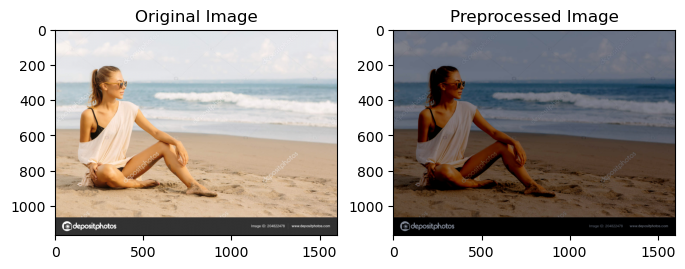

Feature Vector Negatice : [ 2.66032112e-06 -3.41948692e-13  1.31450406e-13  1.16712195e-14
 -3.55271368e-15 -9.76996262e-15  0.00000000e+00  4.44089210e-14
  1.59872116e-14 -1.57859836e-16  1.26374605e-15  5.00728821e-19
 -2.53666939e-16 -6.36135185e-19  3.81639165e-17  1.31838984e-16]


In [151]:
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Load the ResNet50 model pre-trained on ImageNet, excluding the final layers to make it suitable for features not classification
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# class LinearMap(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LinearMap, self).__init__()
#         self.linear = nn.Linear(input_dim, output_dim)
    
#     def forward(self, x):
#         return self.linear(x)

def extract_features(img):
    # Load and preprocess the image
    img_data = image.img_to_array(img)
    img_data_expanded = np.expand_dims(img_data, axis=0)
    img_data_preprocessed = preprocess_input(img_data_expanded)

    # Extract features
    features = base_model.predict(img_data_preprocessed)
    return img, img_data, features

# def trainable_linear_map(img, n_components, input_data):
#     img_path = download_image(img)
#     original_img, preprocessed_img, features = extract_features(img_path)

#     # Convert original image to numpy array for display
#     original_img_array = np.array(original_img)

#     # Instantiate the model
#     model = LinearMap(input_dim, output_dim)

#     # Create dummy input data
#     batch_size = 32
#     # input_data = torch.randn(batch_size, input_dim)

#     # Create dummy target data (for example, a random 16-dimensional vector)
#     target_data = torch.randn(batch_size, output_dim)

#     # Define loss function and optimizer
#     criterion = nn.MSELoss()  # Mean Squared Error loss
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     # Number of epochs
#     num_epochs = 10

#     for epoch in range(num_epochs):
#         # Zero the parameter gradients
#         optimizer.zero_grad()
        
#         # Forward pass
#         outputs = model(input_data)
        
#         # Compute the loss
#         loss = criterion(outputs, target_data)
        
#         # Backward pass and optimize
#         loss.backward()
#         optimizer.step()
        
#         # Print loss
#         if (epoch + 1) % 10 == 0:
#             print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

def reduce_image(img, n_components):
    img_path = download_image(img)
    original_img, preprocessed_img, features = extract_features(img_path)

    # Convert original image to numpy array for display
    original_img_array = np.array(original_img)

    # Plot the original image
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img_array / 255.0)

    # Plot the preprocessed image
    plt.subplot(1, 2, 2)
    plt.title("Preprocessed Image")
    plt.imshow(preprocessed_img / 255.0)

    plt.show()

    # Print the entire feature vector
    # print("Feature shape: ", features.shape)
    # print("Extracted features:", features.flatten())
    # print("Number of features:", len(features.flatten()))
    # print(f"Feature vector: {features.shape}")

    # Get the shape of the feature vector
    num_samples, num_features = features.shape

    # print("Number of samples:", num_samples)
    # print("Number of features:", num_features)

    # Define the PCA object
    pca = PCA(n_components=n_components)

    replicated_feature_vector = np.tile(features, (n_components, 1))
    pca.fit(replicated_feature_vector)
    reduced_vector = pca.transform(features)

    # print("\nOriginal shape:", features.shape)
    # print(f"Original Vector: ", features)

    # print("\nReduced shape:", reduced_vector.shape)
    reshaped_tensor = reduced_vector.reshape(-1)
    # print(f"Reduced Vector: ", reshaped_tensor)

    return reshaped_tensor

feature_vec_pos = reduce_image(new_df["image_pos"][1], 16)
print(f"Feature Vector Positive : {feature_vec_pos}")

feature_vec_neg = reduce_image(new_df["image_neg"][1], 16)
print(f"Feature Vector Negatice : {feature_vec_neg}")


#### DRAFT: Seperate image_circuit and Sentence without combined box

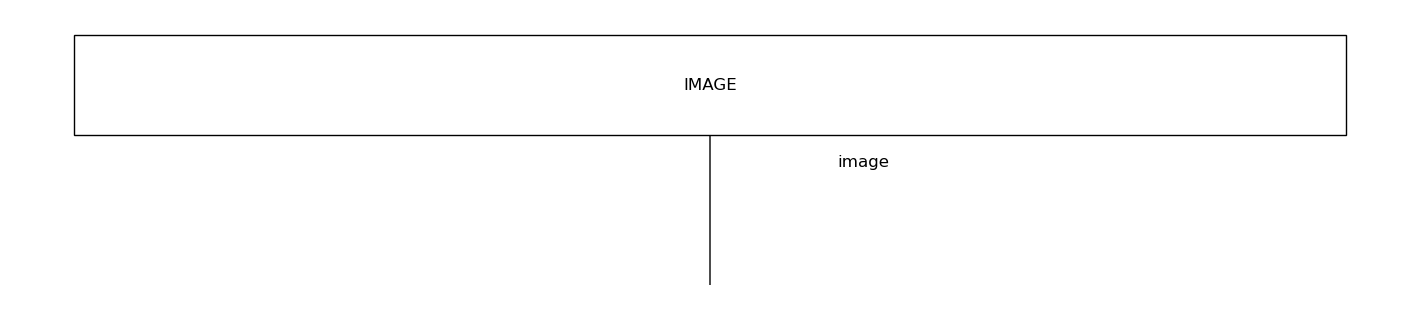

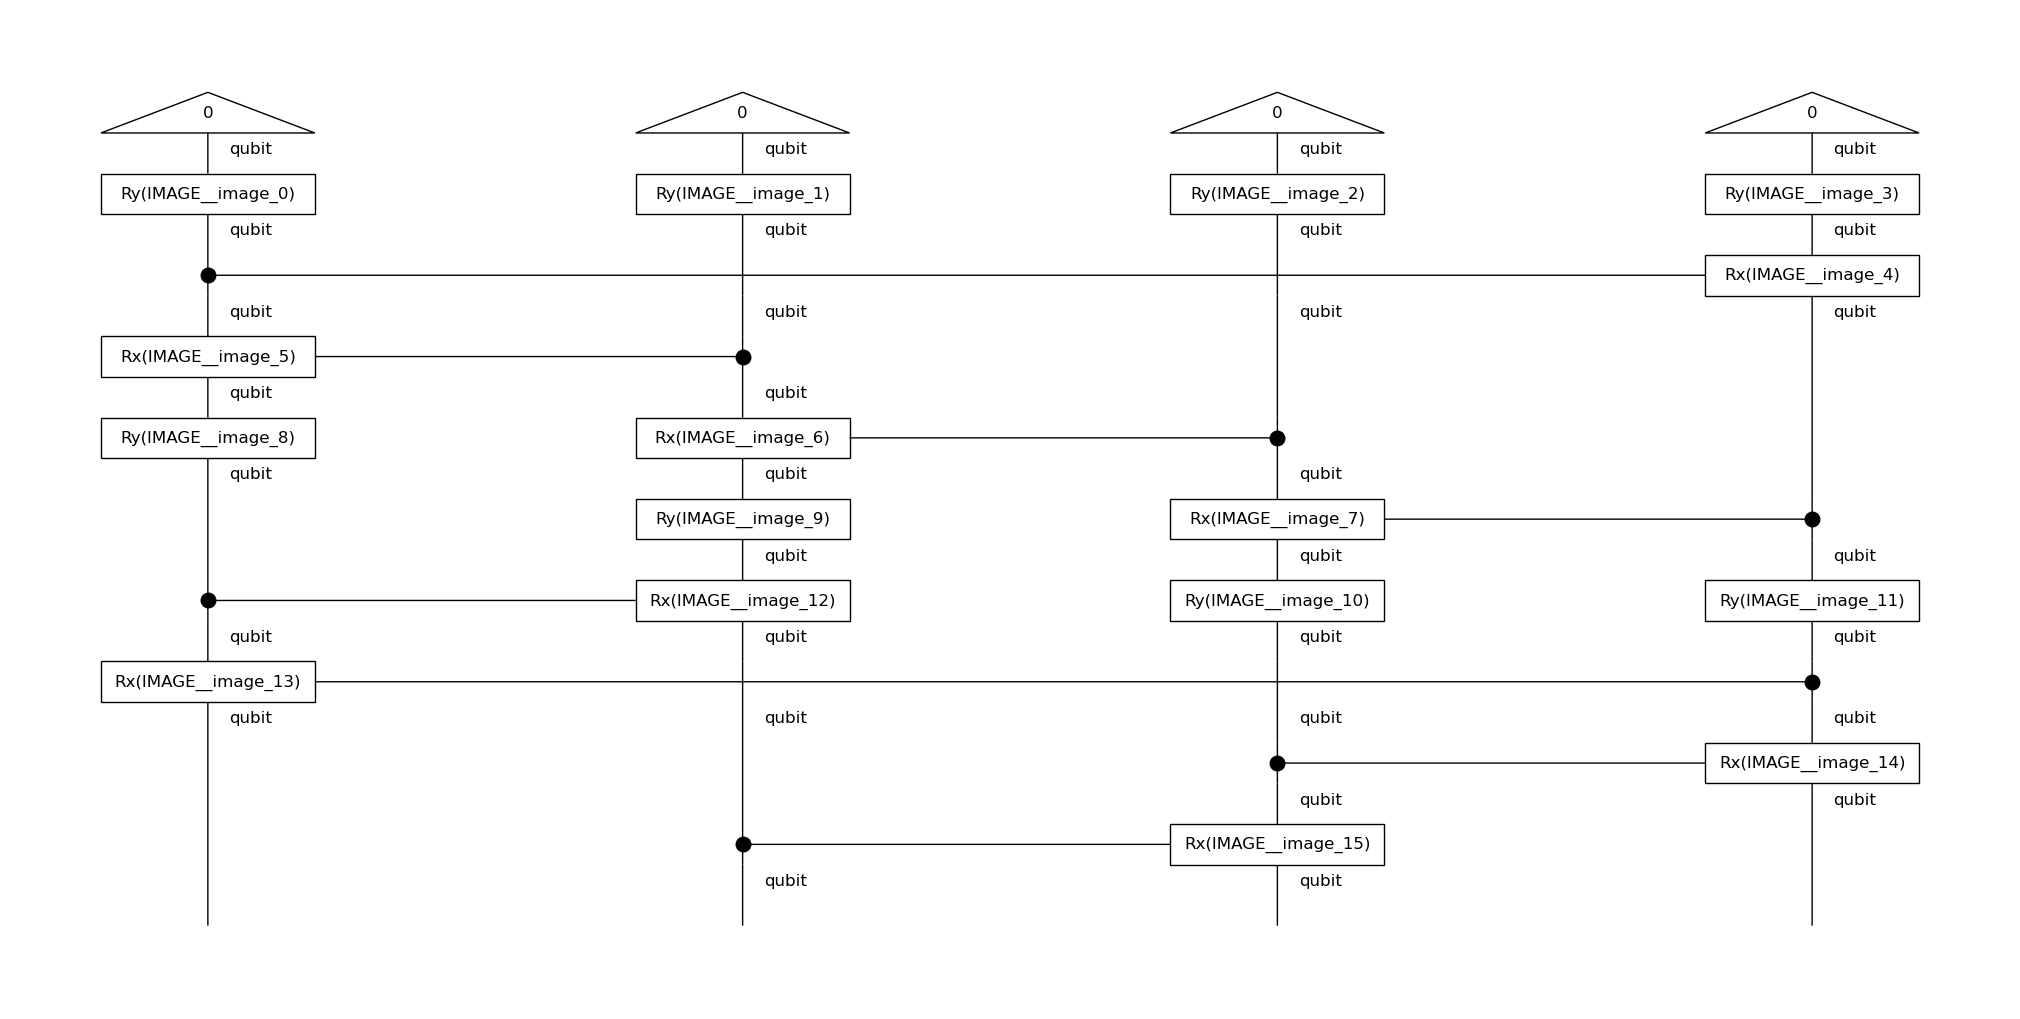

{IMAGE__image_2, IMAGE__image_5, IMAGE__image_10, IMAGE__image_3, IMAGE__image_8, IMAGE__image_1, IMAGE__image_13, IMAGE__image_0, IMAGE__image_11, IMAGE__image_6, IMAGE__image_7, IMAGE__image_12, IMAGE__image_4, IMAGE__image_15, IMAGE__image_14, IMAGE__image_9}
[ 2.5502552e-06  6.1817218e-13  1.5987212e-13 -4.7961635e-14
 -4.9737992e-14 -1.3216095e-12  7.1054274e-15 -5.5067062e-14
  8.1712415e-14 -6.9944051e-15 -1.4988011e-14 -8.1315163e-19
 -5.8233515e-22  2.0162527e-24  8.4818325e-27  7.2701421e-27]


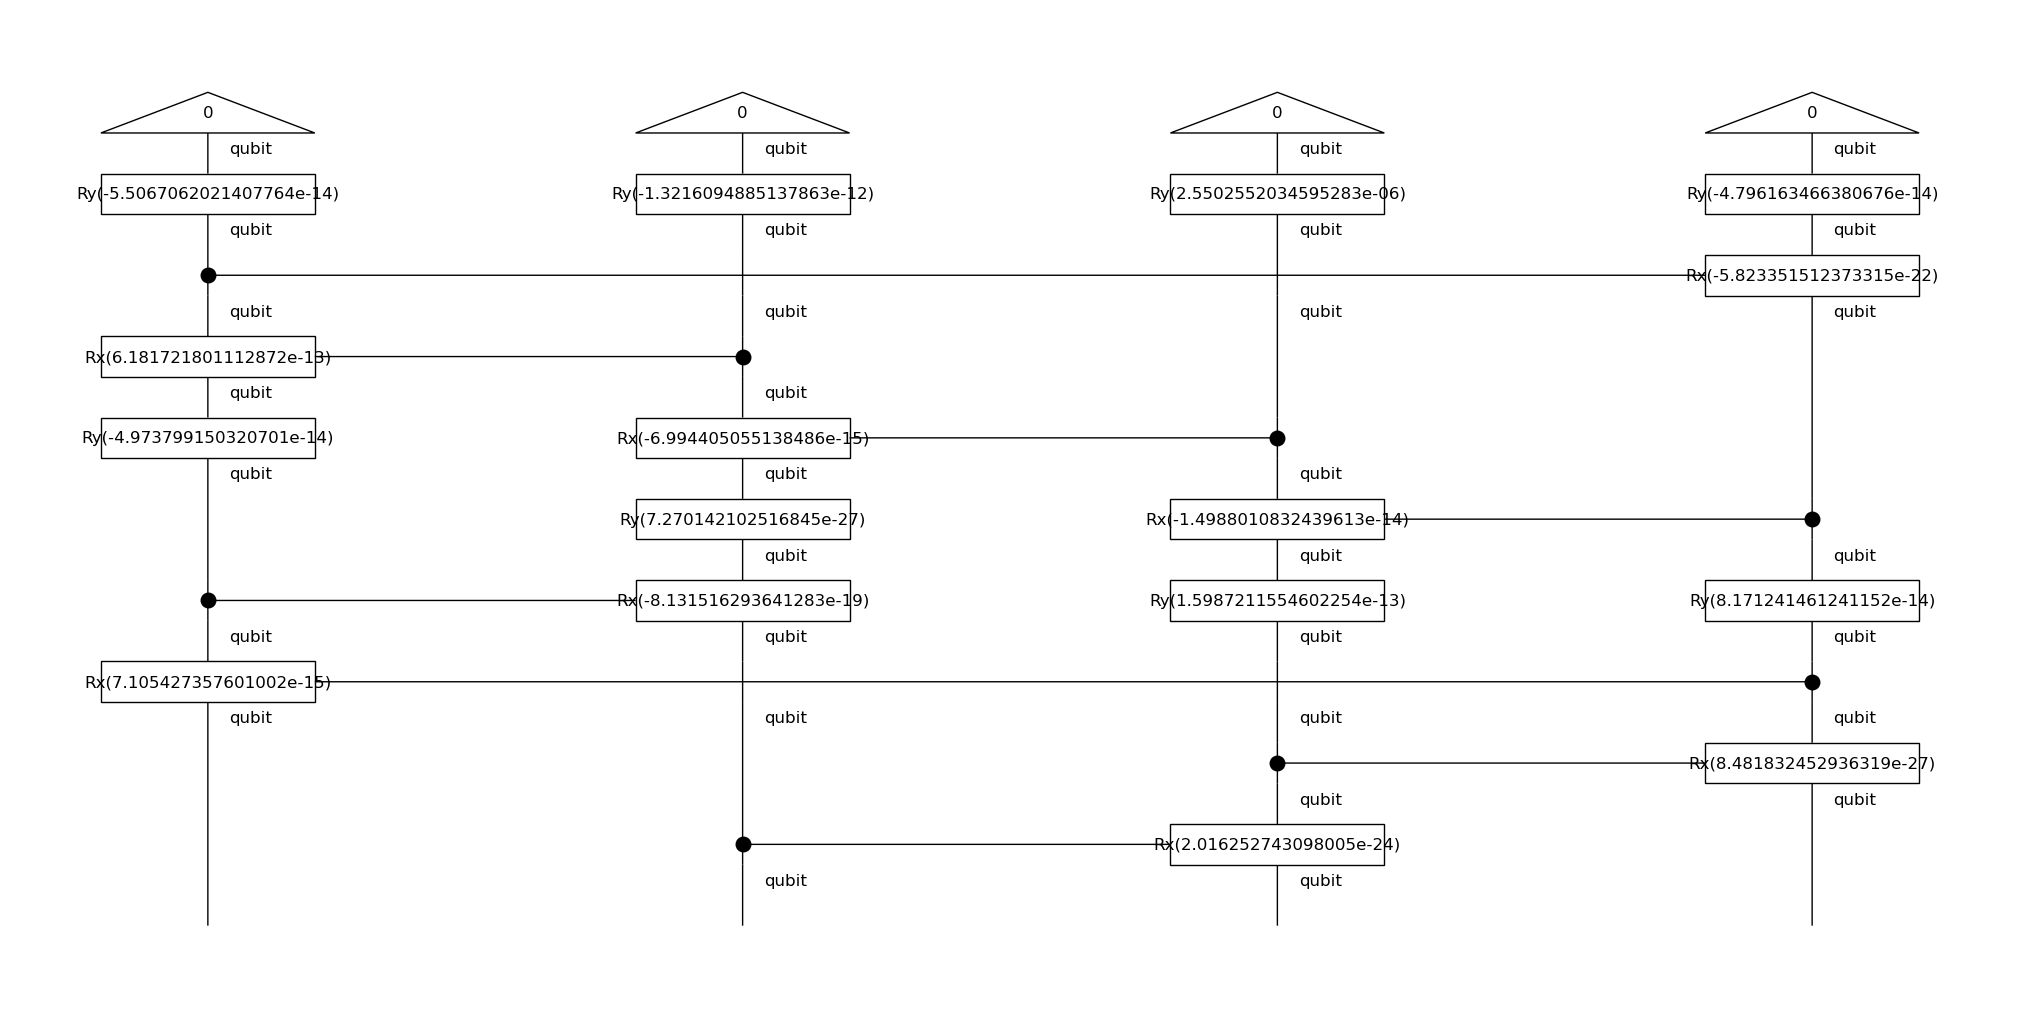

In [175]:
from lambeq.backend.grammar import Ty, Box 
from lambeq import Sim14Ansatz
from torch import nn

# Create a new image Ty
image_type = Ty("image")
image_box = Box(name = "IMAGE", dom = Ty(), cod= image_type)
image_box.draw(figsize=(14, 3), fontsize=12)

# Create template Ansatz
ansatz = Sim14Ansatz({image_type: 4}, n_layers=1)
image_circ = ansatz(image_box)
image_circ.draw(figsize=(20, 10), fontsize=12)

print(image_circ.free_symbols)
print(feature_vec_pos)

# Add data into image circuit POS
conc_image_circ_pos = image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec_pos) 
conc_image_circ_pos.draw(figsize=(20, 10), fontsize=12)

# Add data into image circuit NEG
# conc_image_circ_neg = image_circ.lambdify(*list(image_circ.free_symbols))(*feature_vec_neg) 
# conc_image_circ_neg.draw(figsize=(20, 10), fontsize=12)

Join the positive image circuits and negative image circuit and sentence without comparison box but with the vector variables.

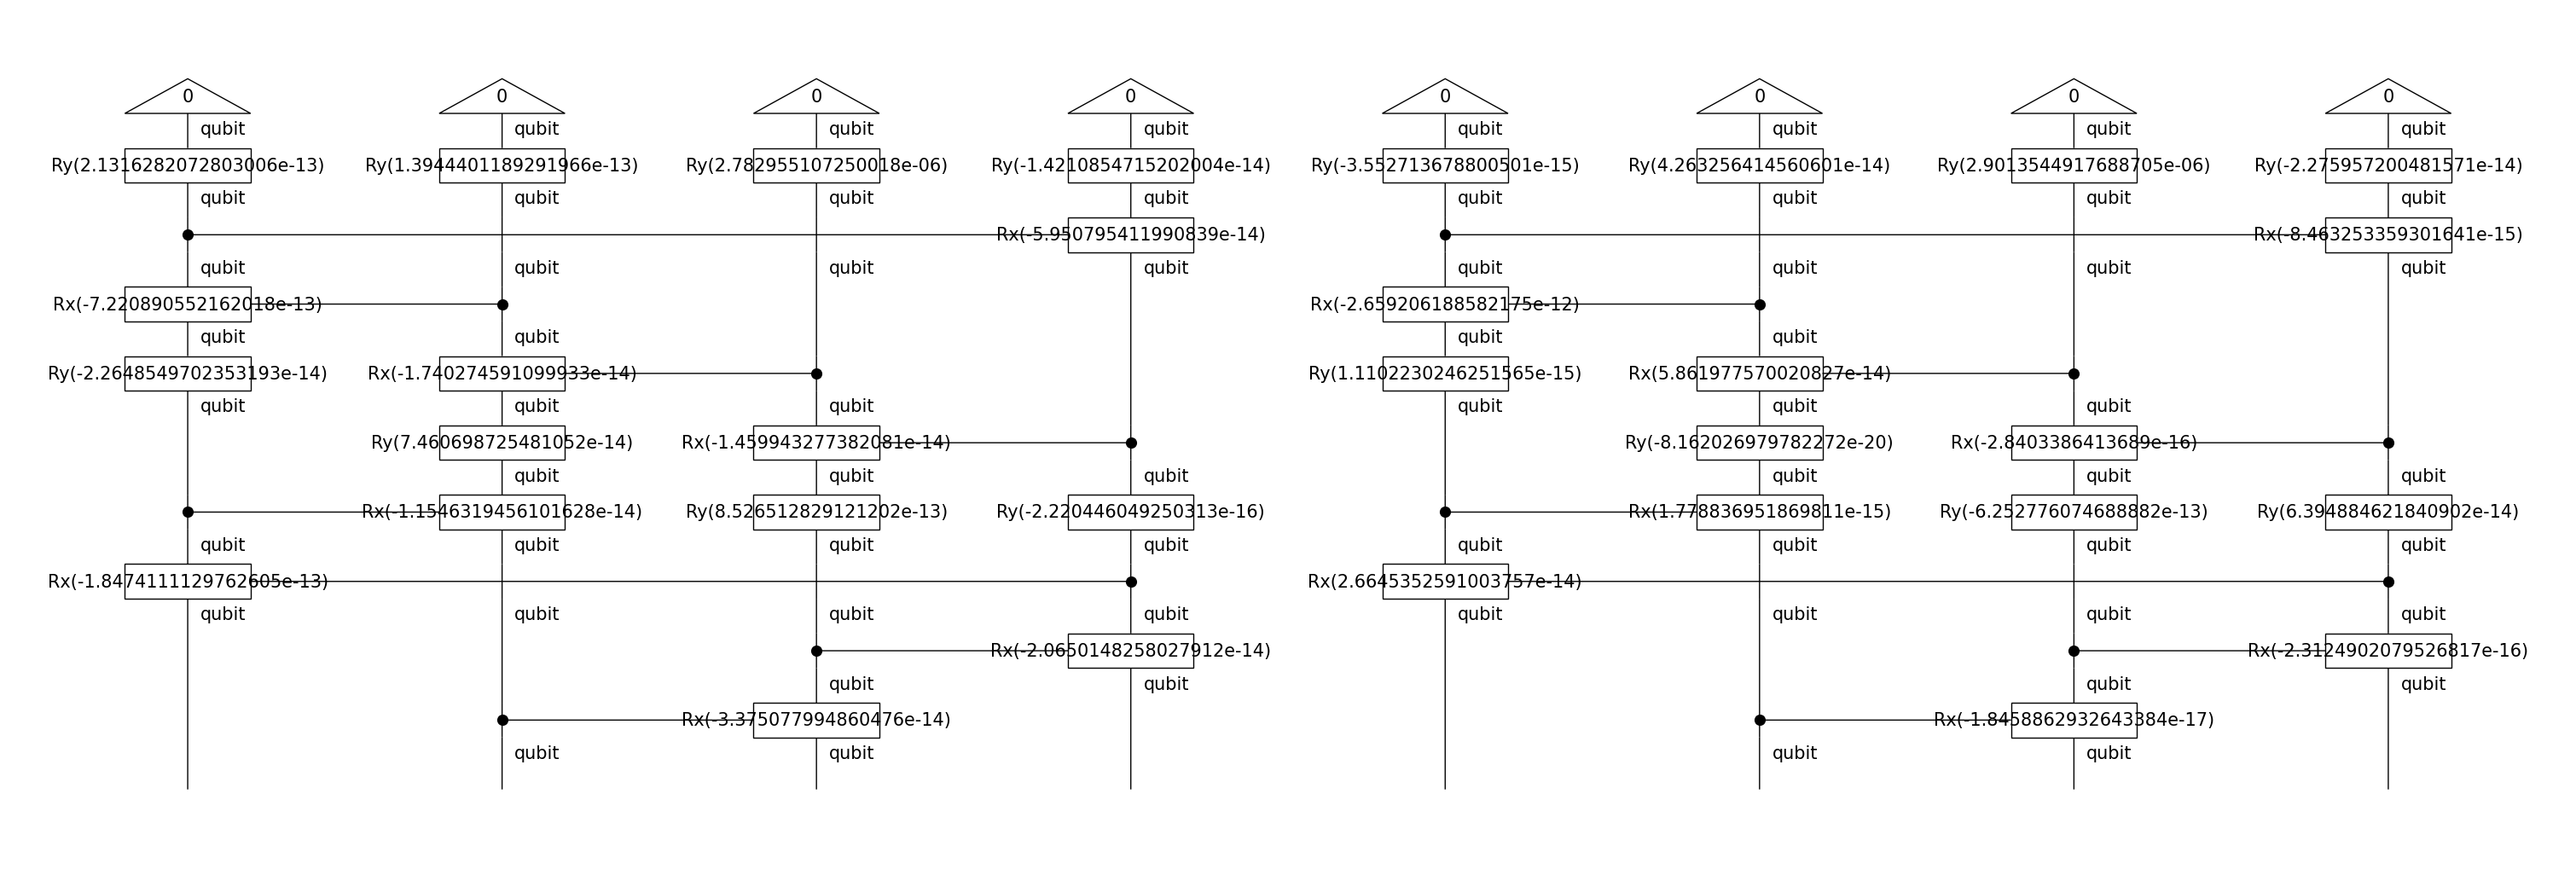

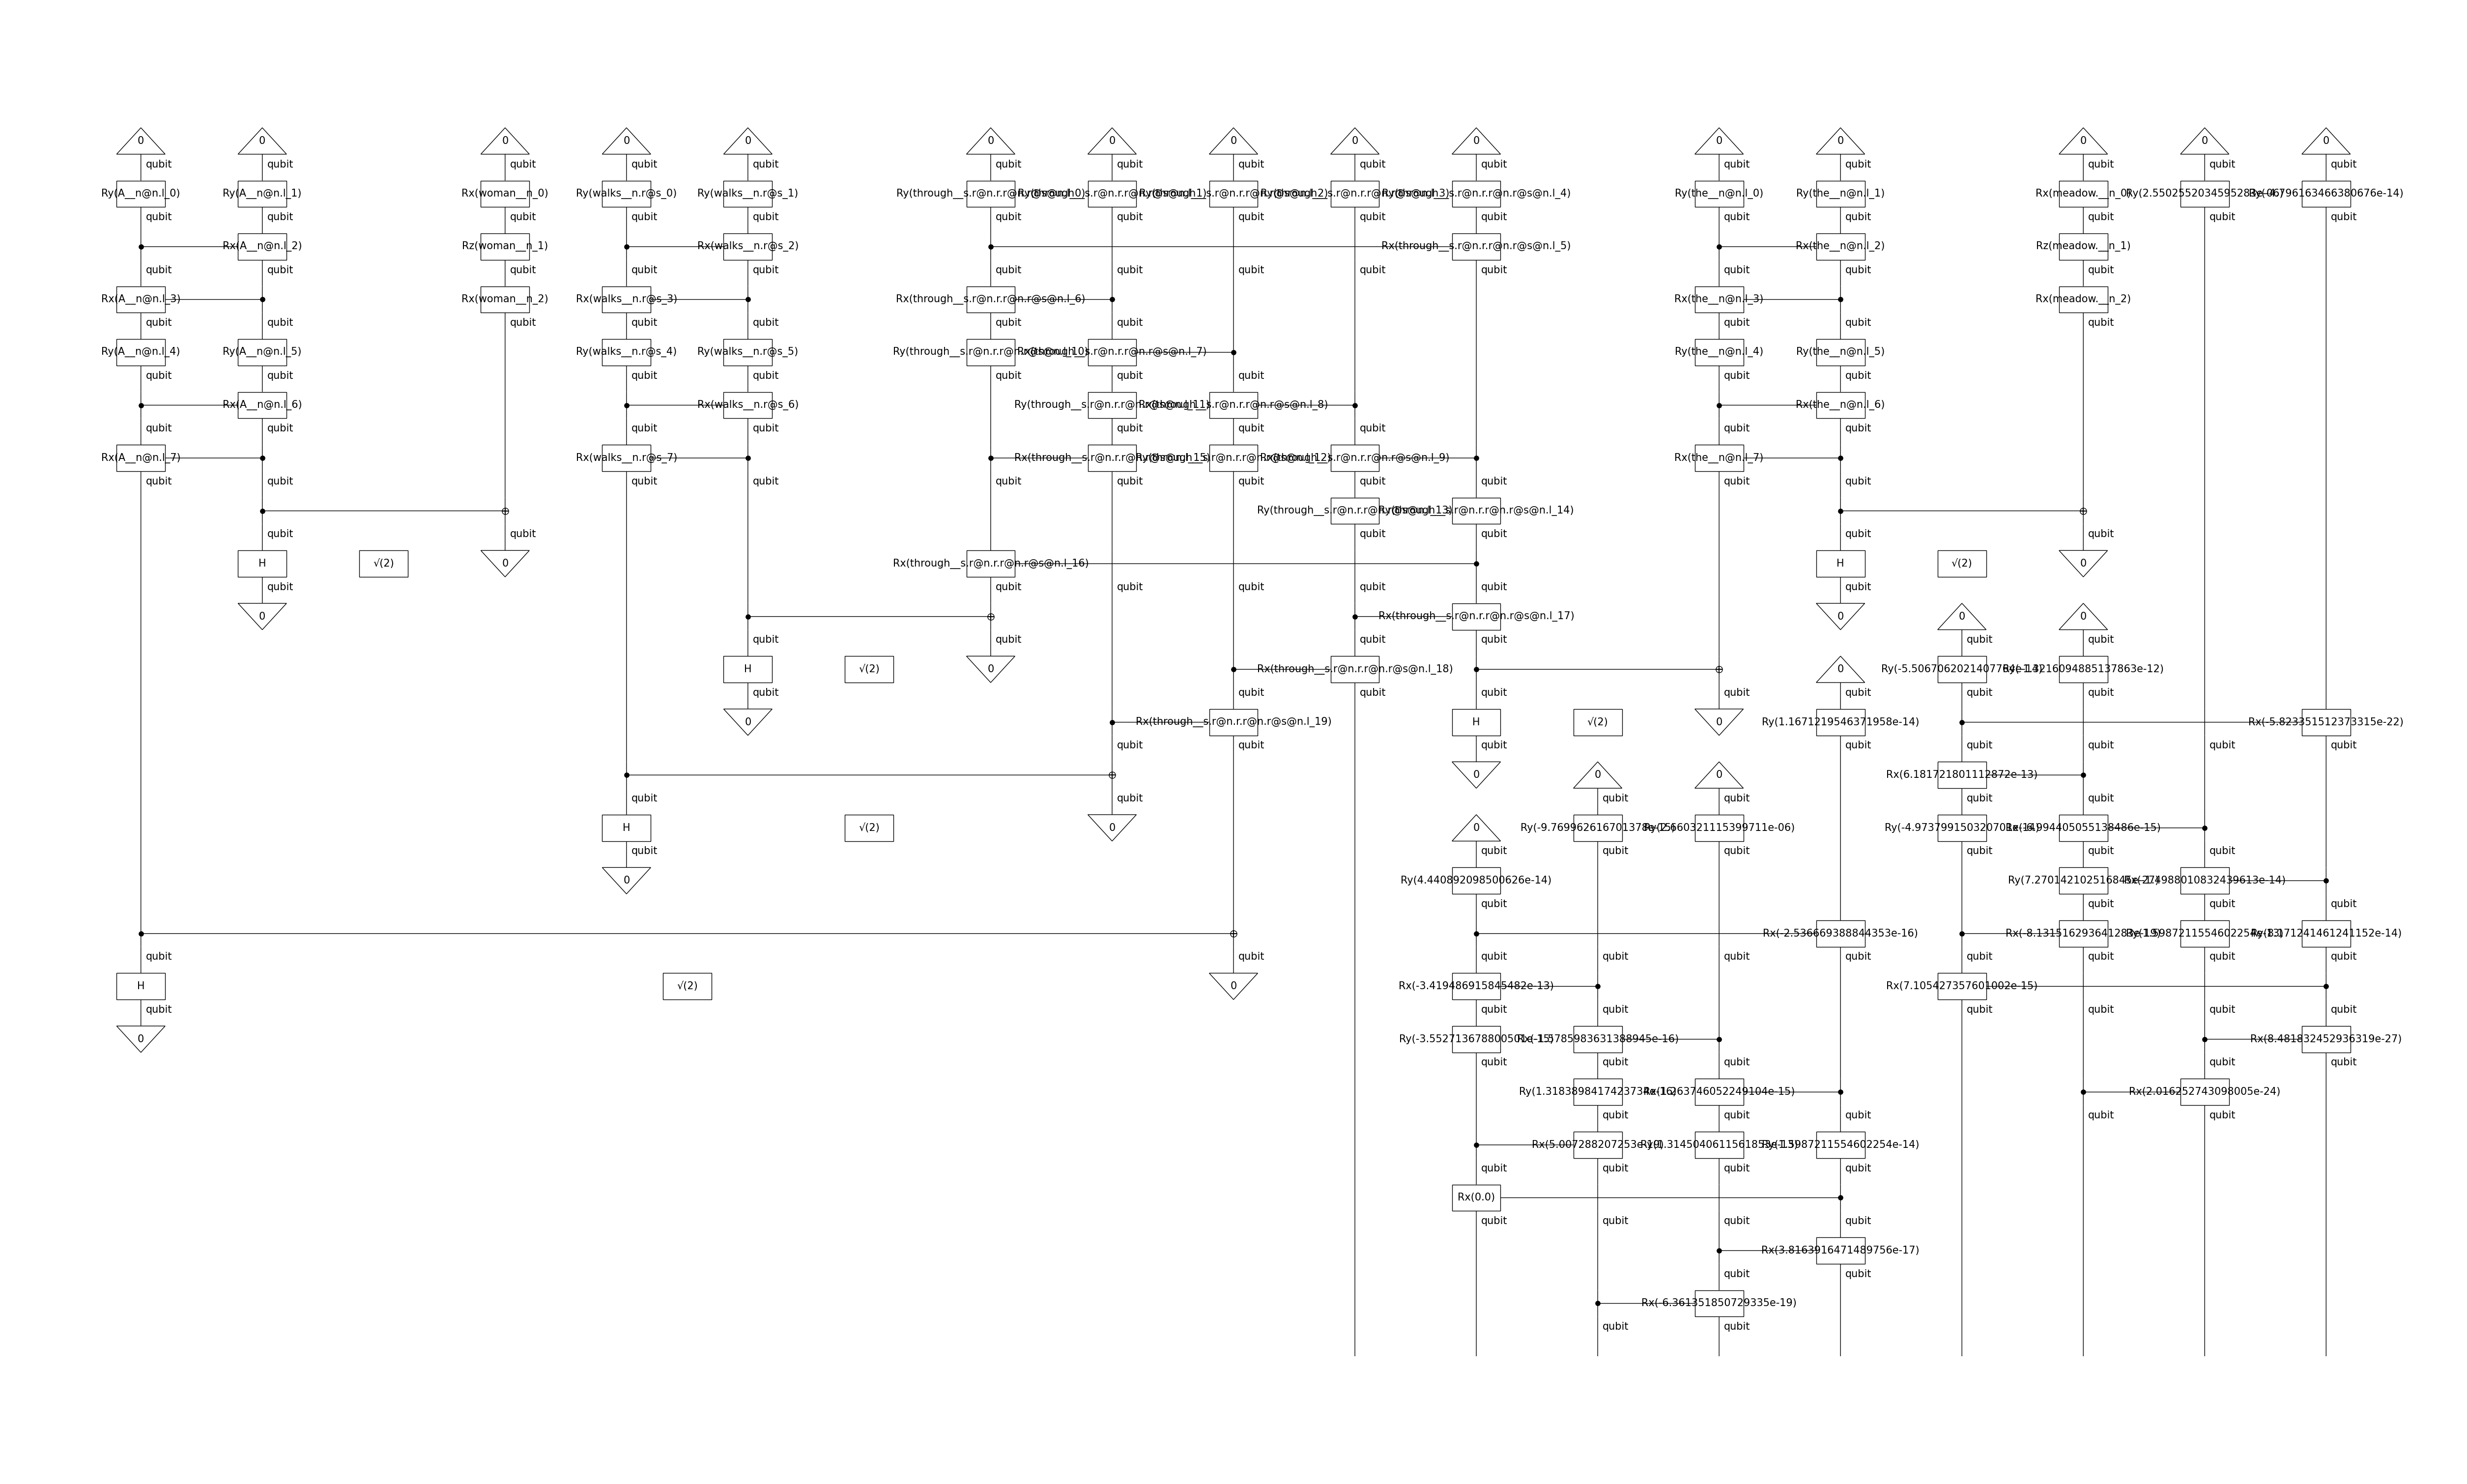

In [204]:
# joined circuits
# output_type = Ty("output")
# comparison_box = Box("COMPARISON", AtomicType.SENTENCE @ image_type @ image_type, output_type)

combined_img_conc = conc_image_circ_neg @ conc_image_circ_pos
combined_diagram.draw(figsize=(30, 10), fontsize=15)

joined_circuit = conc_sentence @ combined_img_conc
joined_circuit.draw(figsize=(50, 30), fontsize=15)

# new_circ = joined_circuit >> comparison_box

# new_circ.draw(figsize=(50, 30), fontsize=15)

#### Sentence DisCoCat 

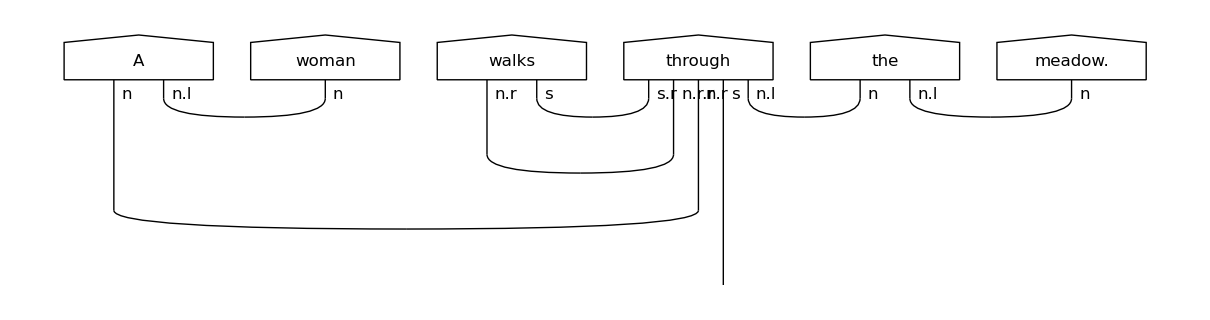

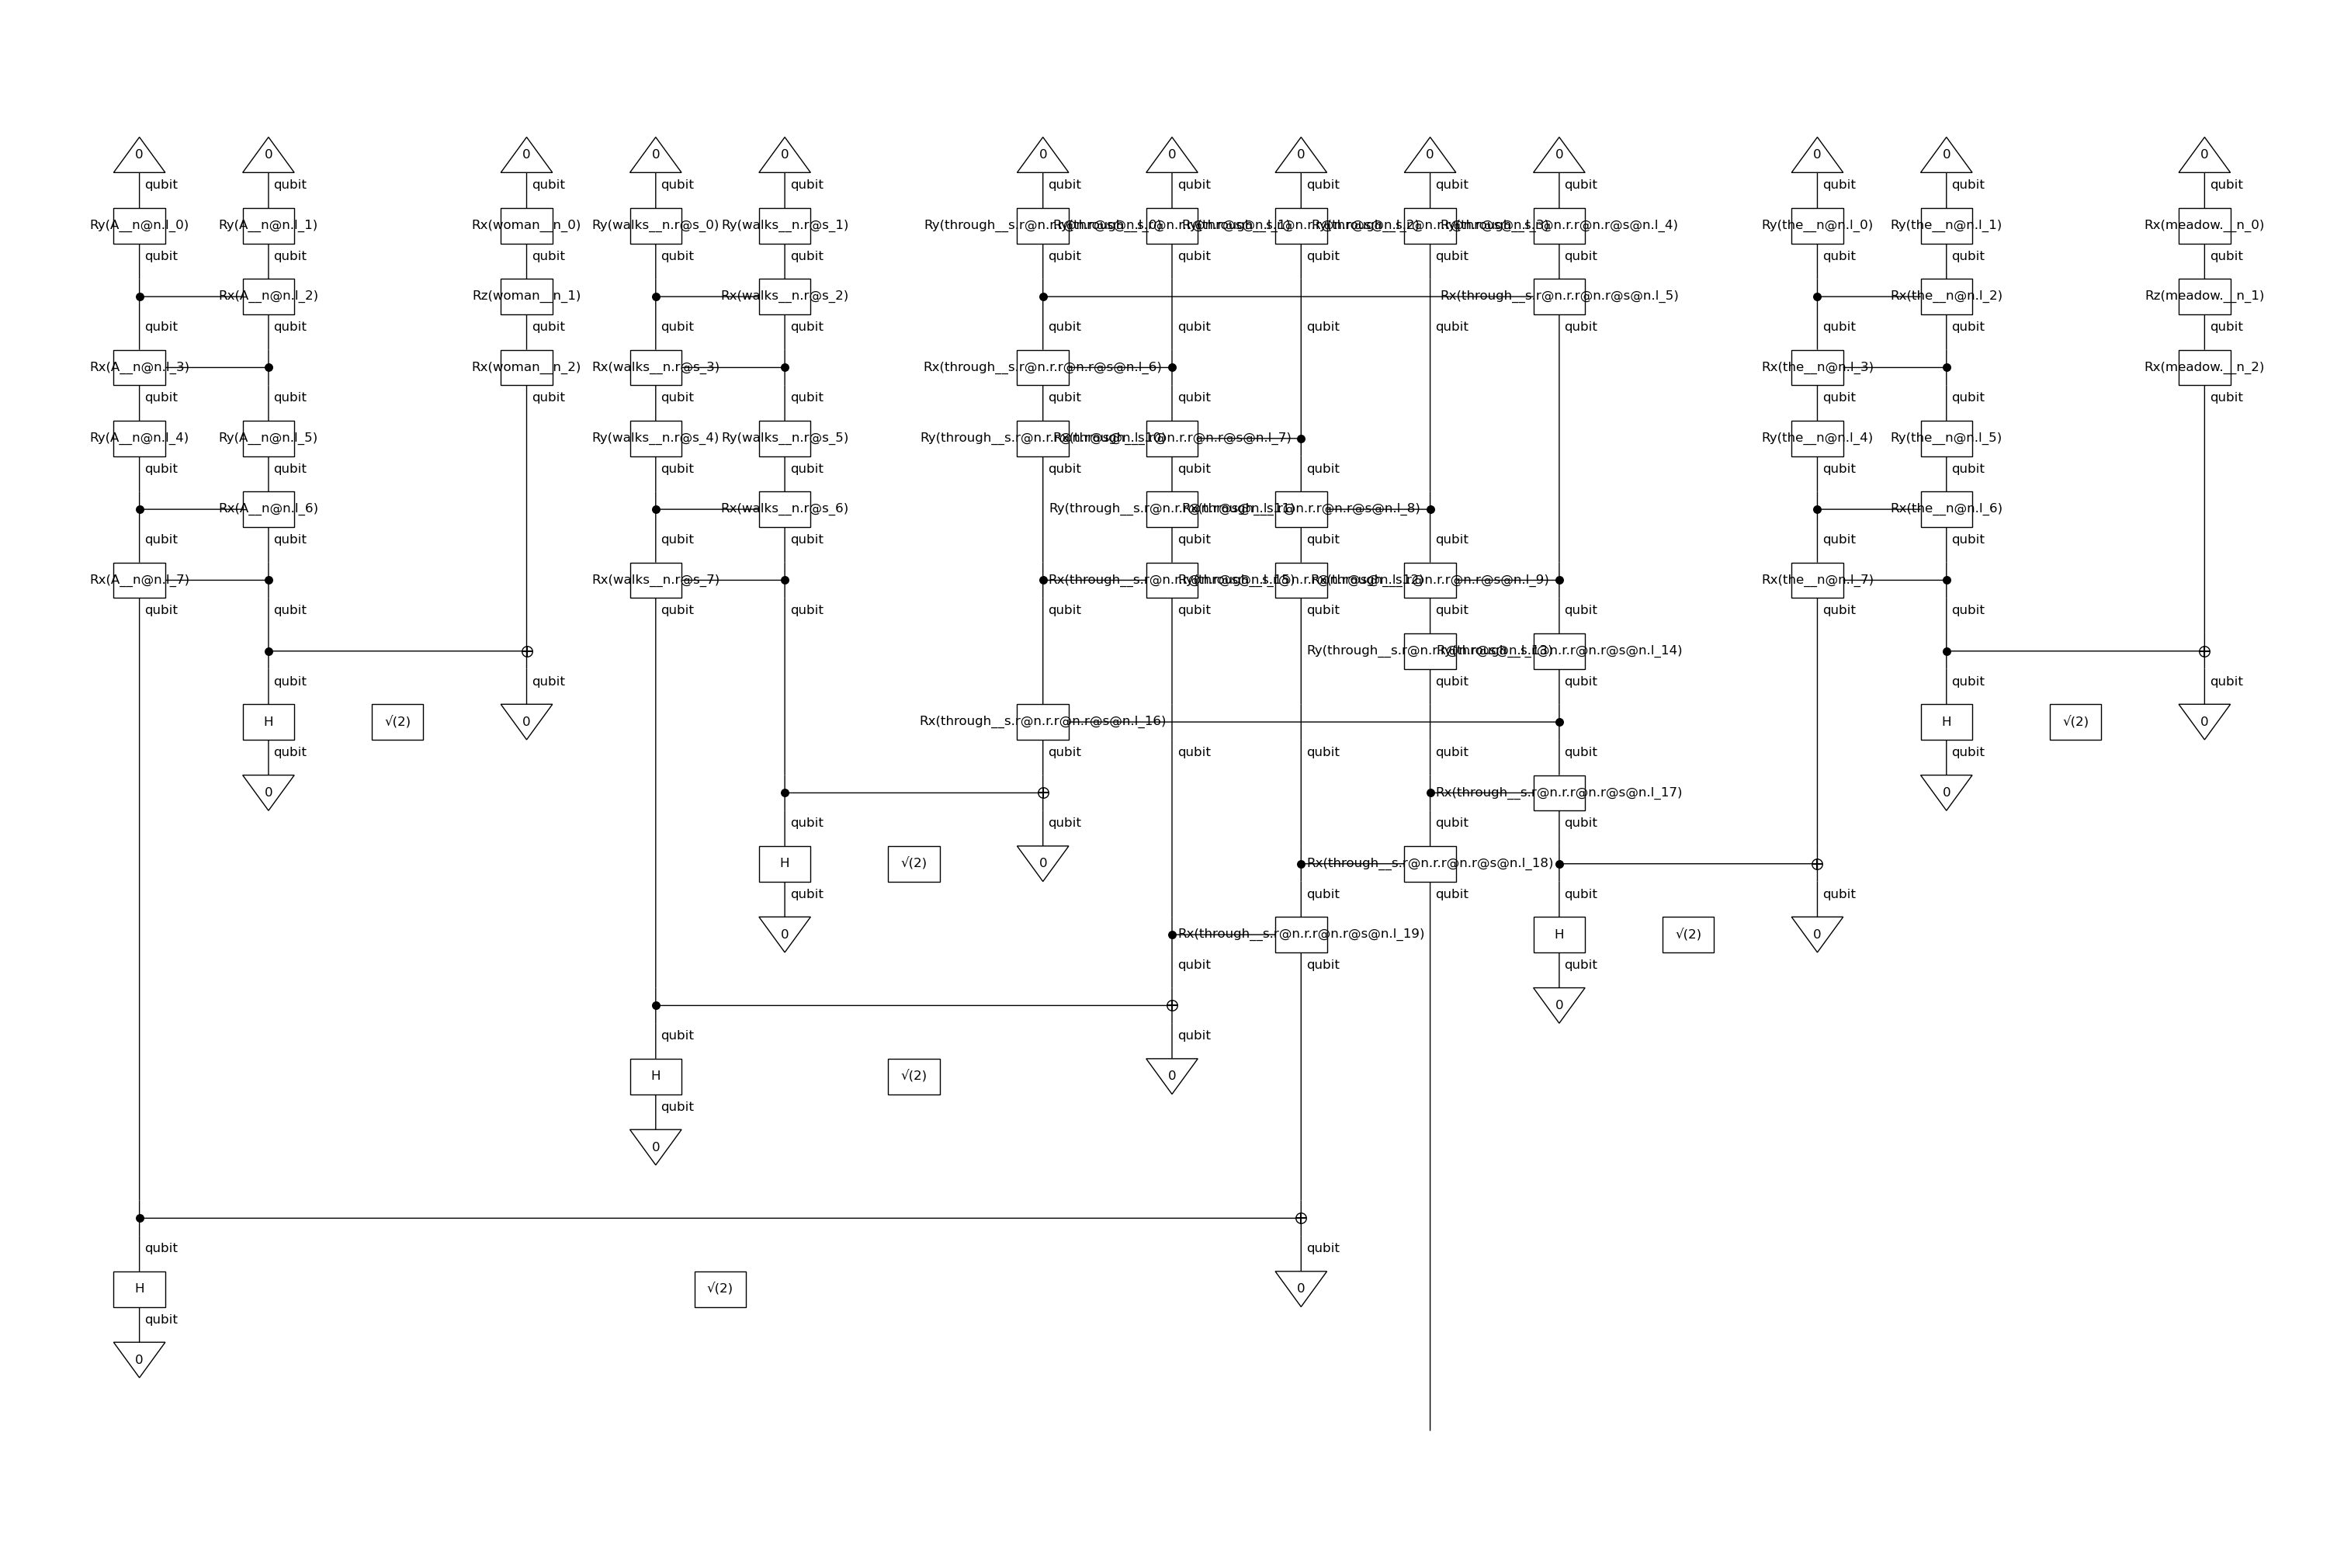

In [157]:
from lambeq import BobcatParser, AtomicType

# image_1 = conc_image_circ
# image_2 = conc_image_circ

# Parse the sentence and convert it into a string diagram
sentence = new_df["sentence"][14]

# Use BobbcatParser
parser = BobcatParser(verbose='suppress')
sentence_diagram = parser.sentence2diagram(sentence)
sentence_diagram.draw(figsize=(14, 3), fontsize=12)

ansatz_sentence = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1},n_layers=1)
conc_sentence = ansatz_sentence(sentence_diagram)

conc_sentence.draw(figsize=(30, 20), fontsize=12)

In [158]:
print("Free symbols: ", len(conc_sentence.free_symbols))

Free symbols:  50


#### Joined Circuits

In [203]:
# Create new Type
image_type = Ty("image")
output_type = Ty("output")
comparison_box = Box("COMPARISON", AtomicType.SENTENCE @ image_type @ image_type, output_type)

# Draw diagram with comparison box (0,1)
temp_diagram = (sentence_diagram @ image_type @ image_type) >> comparison_box
# temp_diagram.draw(figsize=(20, 10), fontsize=12)

# Ansatz & Circuit
ansatz_temp = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, image_type : 4, output_type : 1},  n_layers=1)
circuit = ansatz_temp(temp_diagram)
# circuit.draw(figsize=(60, 40), fontsize=18, draw_type_labels = False )

# Random feature vector: positive and negative
positive_fvect = np.random.rand(16)
negative_fvect = np.random.rand(16)

print(f"Length of free symbols: {len(circuit.free_symbols)}") 

# Fill in the free symbols from the circuit 
conc = circuit.lambdify(*list(circuit.free_symbols))(*positive_fvect) 
conc.draw(figsize=(20, 10), fontsize=12, draw_type_labels = False)



Length of free symbols: 86


TypeError: _lambdifygenerated() missing 70 required positional arguments: 'Dummy_179321', 'Dummy_179350', 'Dummy_179353', 'Dummy_179349', 'Dummy_179307', 'Dummy_179355', 'Dummy_179344', 'Dummy_179309', 'Dummy_179326', 'Dummy_179319', 'Dummy_179361', 'Dummy_179356', 'Dummy_179320', 'Dummy_179366', 'Dummy_179342', 'Dummy_179360', 'Dummy_179380', 'Dummy_179345', 'Dummy_179324', 'Dummy_179362', 'woman__n_0', 'Dummy_179328', 'Dummy_179330', 'Dummy_179304', 'Dummy_179314', 'Dummy_179352', 'Dummy_179365', 'Dummy_179313', 'Dummy_179375', 'Dummy_179371', 'Dummy_179367', 'Dummy_179348', 'Dummy_179299', 'Dummy_179325', 'Dummy_179335', 'Dummy_179358', 'Dummy_179368', 'Dummy_179346', 'Dummy_179334', 'Dummy_179315', 'Dummy_179302', 'Dummy_179311', 'Dummy_179322', 'Dummy_179327', 'woman__n_1', 'Dummy_179316', 'Dummy_179329', 'Dummy_179369', 'Dummy_179377', 'Dummy_179332', 'Dummy_179338', 'Dummy_179379', 'Dummy_179308', 'Dummy_179343', 'Dummy_179363', 'woman__n_2', 'Dummy_179306', 'Dummy_179333', 'Dummy_179378', 'Dummy_179357', 'Dummy_179376', 'Dummy_179351', 'Dummy_179354', 'Dummy_179300', 'Dummy_179337', 'Dummy_179336', 'Dummy_179339', 'Dummy_179381', 'Dummy_179331', and 'Dummy_179372'

In [189]:

# Create new Type
image_type = Ty("image")
output_type = Ty("output")
comparison_box = Box("COMPARISON", AtomicType.SENTENCE @ image_type @ image_type, output_type)

# comparison_box.draw()

# CHANGE IMAGE TYPE TO IMAGE DIAGRAM
temp_diagram1 = (sentence_diagram @ image_type @ image_type) >> comparison_box
# temp_diagram1 = (sentence_diagram @ image_box @ image_box) >> comparison_box
# temp_diagram1.draw(figsize=(20, 10), fontsize=12)

ansatz_temp = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, image_type : 4, output_type : 1},  n_layers=1)
conc = ansatz_temp(temp_diagram1)

print("Free symbols: ", len(conc.free_symbols))
# conc.draw(figsize=(60,30), fontsize=20, draw_type_labels = False)

# conc = conc.lambdify(*list(conc.free_symbols))(*feature_vec_pos) 
random_feature_vector = np.random.rand(32)

# Filter free symbols to include only "image type" symbols
image_type_symbols = [symbol for symbol in conc.free_symbols if 'image' in str(symbol)]


# num_image_type_symbols = len(image_type_symbols)
# for x in image_type_symbols:
#     print(x)

# print("Number of Image Type Symbols:", num_image_type_symbols)




Free symbols:  86


TypeError: _lambdifygenerated() missing 54 required positional arguments: 'Dummy_108000', 'Dummy_107965', 'Dummy_107944', 'Dummy_107982', 'woman__n_0', 'Dummy_107948', 'Dummy_107950', 'Dummy_107924', 'Dummy_107934', 'Dummy_107972', 'Dummy_107985', 'Dummy_107933', 'Dummy_107995', 'Dummy_107991', 'Dummy_107987', 'Dummy_107968', 'Dummy_107919', 'Dummy_107945', 'Dummy_107955', 'Dummy_107978', 'Dummy_107988', 'Dummy_107966', 'Dummy_107954', 'Dummy_107935', 'Dummy_107922', 'Dummy_107931', 'Dummy_107942', 'Dummy_107947', 'woman__n_1', 'Dummy_107936', 'Dummy_107949', 'Dummy_107989', 'Dummy_107997', 'Dummy_107952', 'Dummy_107958', 'Dummy_107999', 'Dummy_107928', 'Dummy_107963', 'Dummy_107983', 'woman__n_2', 'Dummy_107926', 'Dummy_107953', 'Dummy_107998', 'Dummy_107977', 'Dummy_107996', 'Dummy_107971', 'Dummy_107974', 'Dummy_107920', 'Dummy_107957', 'Dummy_107956', 'Dummy_107959', 'Dummy_108001', 'Dummy_107951', and 'Dummy_107992'